In [1]:
import psycopg2
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

from config import DB_CONFIG


In [2]:
NUM_OF_VESSELS = 50000

conn = psycopg2.connect(**DB_CONFIG)
traj_sql = f'SELECT mmsi, dates, geom FROM vessels_points_jan ORDER BY mmsi DESC, dates DESC LIMIT {NUM_OF_VESSELS}'
df = gpd.GeoDataFrame.from_postgis(traj_sql, conn, geom_col='geom').drop('geom', axis=1)

In [3]:
vessel_stamps = [df[df['mmsi'] == vessel] for vessel in df.mmsi.unique()]

less_than = [0] * 50

In [4]:
# stamps: mmsi | date pairs for each vessel sorted by date
for stamps in vessel_stamps:
    for i in range(len(stamps.dates) - 1):
        stamp = stamps.iloc[i].dates
        prev_stamp = stamps.iloc[i+1].dates
        days_diff = (stamp - prev_stamp).days

        # Less than a day difference
        if(days_diff == 0):
            sec = (stamp - prev_stamp).seconds
            pos = int(sec/5)

            if(pos>=49):
                pos = 49

            less_than[pos] +=1


In [5]:
# TODO Calculate average time difference (sample rate) per ship

#PLOT
x_axis = []
for i in range(0,51):
    x_axis.append(i*5)

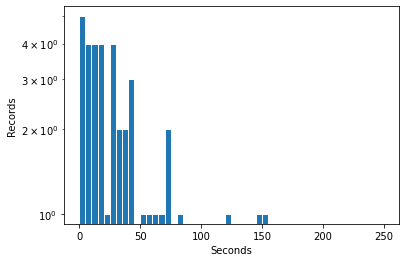

In [7]:
plt.figure('Sample rate per vessel')
plt.hist(less_than,log=True ,bins = x_axis, edgecolor = 'white')
plt.ylabel('Records')
plt.xlabel('Seconds')
#plt.xticks(np.arange(0,255,5))
plt.show()

conn.close()